## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
from datetime import datetime, timedelta
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
#открываем файл с данными
hypothesis = pd.read_csv('..../hypothesis.csv')

#вывод таблицы
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 5 столбцов и 9 строк, типы данных (по столбцам): `int64`(4), `object`(1).

Описание столбцов:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение `Efforts`, тем дороже проверка гипотезы).

Все названия столбцов нужно привести к одному регистру.

In [4]:
#открываем файл с данными
orders = pd.read_csv('..../orders.csv')
visitors = pd.read_csv('..../visitors.csv')

#вывод таблиц
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 5 столбцов и 1197 строк, типы данных (по столбцам): `int64`(3), `object`(2).

Описание столбцов:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Все названия столбцов нужно привести к "змеиному" стилю, т.е. добавить " _ " там, где это уместно.

Также в таблице есть столбец `date`, для которого логичнее использовать тип данных для работы с датами.

In [6]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 3 столбца и 62 строки, типы данных (по столбцам): `int64`(1), `object`(2).

Описание столбцов:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

B таблице есть столбец `date`, для которого логичнее использовать тип данных для работы с датами.

<div style="border:solid green 1px; padding: 10px">

У нас в распоряжении таблицы:
    
- `hypothesis` — данные о 9 гипотезах по увеличению выручки интернет-магазина с указанными параметрами охвата пользователей, влияния на пользователей, уверенности, затрат ресурсов на проверку гипотезы;
- `visitors` и `orders` - результаты, описывающие проведение A/B-теста (данные о пользовательских посещениях и их заказах за август 2019г.).

Предварительно можно утверждать, что данных достаточно для проведения исследования.

Чтобы двигаться дальше, нужно устранить небольшие проблемы в данных, выявленные выше.

In [7]:
# переименование столбцов
hypothesis.columns = hypothesis.columns.str.lower()
orders = orders.rename(
    columns={
        'transactionId': 'transaction_id',
        'visitorId': 'visitor_id'
    }
)
# преобразование данных о времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
#проверка на дубликаты
print(visitors.duplicated().sum())
orders.duplicated().sum()

0


0

## 1 часть. Приоритизация гипотез

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса приоритизируем сформулированные гипотезы.

### Применим фреймворк ICE

Фреймворк `ICE` (влияние `impact`, уверенность `confidence`, усилия `efforts`) — один из самых популярных способов приоритизации задач.

Параметры:
- `impact` - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- `confidence` - насколько мы уверены, что это изменение повлияет на пользователей именно так;
- `efforts` - сколько стоит протестировать эту гипотезу.

In [9]:
# добавим в тадлицу гипотез колонку расчитанного фреймворка
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

# выведем результаты, отсортированные по убыванию приоритета
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00



Наиболее перпективные гипотезы по `ICE`: 9, 1 и 8.

### Применим фреймворк RICE

Фреймворк `RICE` - это модификация `ICE`, в которой помимо трех параметров, исрпользуемых в `ICE`, есть еще один — охват `reach` — скольких пользователей затронет изменение, которое мы хотим внести.

In [10]:
# добавим в тадлицу гипотез колонку расчитанного фреймворка
hypothesis['RICE'] = round(
    (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

# выведем результаты, отсортированные по убыванию приоритета
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0



Наиболее перпективные гипотезы по `RICE`: 8, 3, гипотезы 1 и 7 делят третье место.

<div style="border:solid green 1px; padding: 10px">

### Посмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE

При применении `RICE` вместо `ICE` изменилась приоритизация гипотез: 9я гипотеза "вылетела" из лидеров и заняла 4е место, 1я гипотеза "сползла" на 3е место, да еще и разделила его с 7й, а вот 8я переместилась в лидеры. Также на 2м месте разместилась 2я гипотеза, которая при применении первого фреймворка была аж на 5м месте.

Это произошло из-за влияния параметра охвата `reach` на конечный результат: у 8й гипотезы он равен 10 баллам, у 3й - 8 баллам, у 1й и 7й - 3 и 5 баллам соответственно, а у 9й - одному, что и определило ей 4е, а уже не 1е, место. 

Таким образом можно утверждать, что охват пользователей напрямую влияет на то, получится ли повлиять на улучшение ключевых метрик бизнеса с помощью внедрения инструментов, указанные в гипотезах.

## 2 часть. Анализ A/B-теста

Весь трафик был поделен на две группы (А и В). Каждой демонстрировали определённую версию страницы, собирали данные о визитах и покупках. Затем полученную информацию собрали в таблицы, которые сейчас в нашем распоряжении. Мы проанализируем данные, построим графики, подсчитыем метрики, различия между ними, степень уверенности в различиях. И сделаем вывод об эффективности изменений относительно контрольной группы, взаимодействующей с исходной версией страницы.

Чтобы построить графики, нужно собрать кумулятивные данные.

Объявим датафрейм `cumulative_df` со столбцами:
* `date` — дата;
* `group` — группа A/B-теста (A или B);
* `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
* `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

А также посмотрим:
    
- сколько у нас групп в А/В-тесте;

In [11]:
print(orders['group'].sort_values().unique())

['A' 'B']


- даты начала и окончания теста;

In [12]:
print('Начало теста: ', orders['date'].dt.date.min())
print('Окончание теста: ', orders['date'].dt.date.max())

Начало теста:  2019-08-01
Окончание теста:  2019-08-31


- сколько пользователей в каждой группе - по таблице с заказами;

In [13]:
print('Количество пользователей в грyппе А: ', orders.query('group == "A"')['visitor_id'].nunique())
print('Количество пользователей в грyппе B: ', orders.query('group == "B"')['visitor_id'].nunique())

Количество пользователей в грyппе А:  503
Количество пользователей в грyппе B:  586


In [14]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные данные по дням (о заказах)
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                       .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique',
                             'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])
)
# получаем агрегированные кумулятивные данные по дням (о посетителях интернет-магазина)
visitors_aggregated = (
    dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                       .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date','group'])
)
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_df = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_df.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#выводим первые 5 строк полученной таблицы
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


###  Анализ по всем представленным данным.

####  Построим график кумулятивной выручки по дням и группам. 

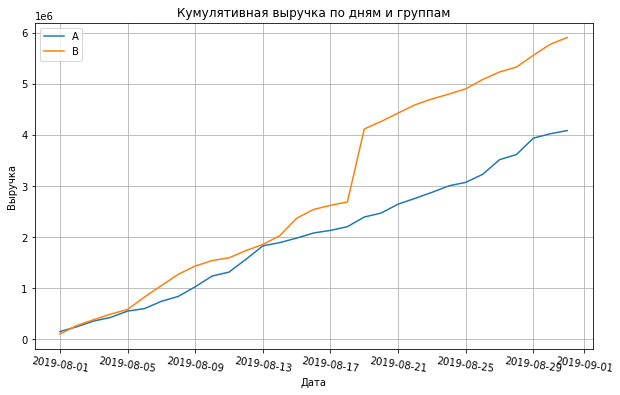

In [15]:
# таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_df.query('group == "A"')[['date','revenue', 'orders']]

# таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_df.query('group == "B"')[['date','revenue', 'orders']]

# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 6))
plt.grid()
plt.xticks(rotation =-8)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням и группам')
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend();

<div style="border:solid green 1px; padding: 10px">

Выручка группы В в первые 5 дней теста практически одинакова с группой А, с 5 августа довольно равномерно увеличивается, а после 17 августа наблюдвется резкий скачек и далее плавное продолжение роста, тогда как выручка группы А имеет относительно плавную линию роста в течении всего месяца.

Это может сигнализировать о всплесках числа заказов в группе В, либо о появлении очень дорогих заказов в выборке по этой группе.

#### Построим график кумулятивного среднего чека по дням и группам.

Для этого разделим кумулятивную выручку на кумулятивное число заказов.

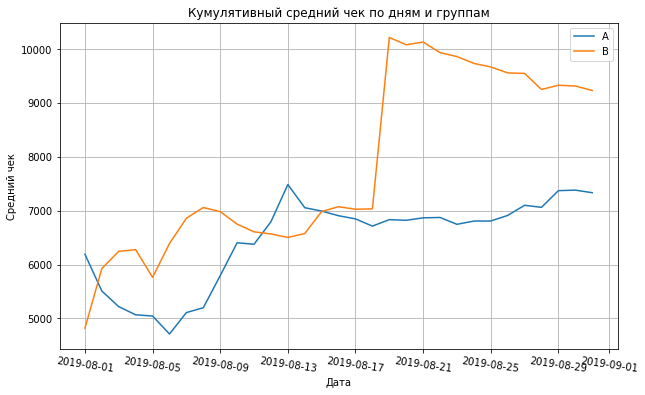

In [16]:
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 6))
plt.grid()
plt.title('Кумулятивный средний чек по дням и группам')
plt.xticks(rotation =-8)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
# Строим график группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

# Строим график группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend();

<div style="border:solid green 1px; padding: 10px">

Средний чек становится равномерным ближе к концу теста и установился для обеих групп. Однако в первой половине теста по двум группа наблюдаются скачки (в районе 6го дня для группы А и в районе 18го дня для группы В).
    
Возможно, в группы в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда им нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

 Возможно дело в "аномальных" суммах заказов. Посмотрим на график без таких сумм:

In [17]:
# убираем из выборки крупные заказы
dates_groups_v1 = orders.query('revenue <= 50000')[['date','group']].drop_duplicates()
orders_aggregated_v1 = (
    dates_groups_v1.apply(lambda x: orders[np.logical_and(np.logical_and(orders['date'] <= x['date'], orders['group']
                                                                         == x['group']), orders['revenue'] <= 100000)]
                       .agg({'date': 'max', 'group': 'max', 'transaction_id': 'nunique', 'visitor_id': 'nunique',
                             'revenue': 'sum'}), axis=1).sort_values(by=['date','group'])
)
cumulative_df_v1 = orders_aggregated_v1.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_df_v1.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a_v1 = cumulative_df_v1.query('group == "A"')[['date','revenue', 'orders']]

# таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b_v1 = cumulative_df_v1.query('group == "B"')[['date','revenue', 'orders']]

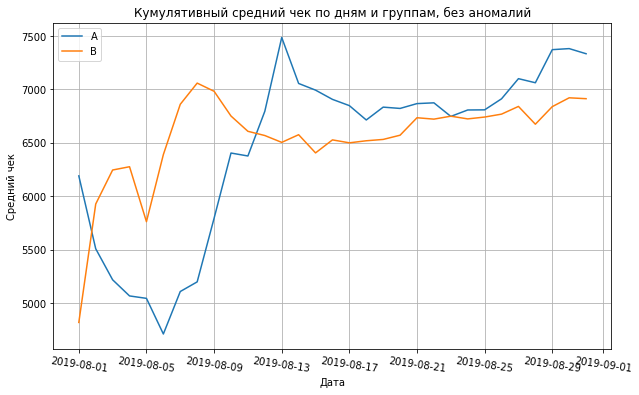

In [18]:
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 6))
plt.grid()
plt.title('Кумулятивный средний чек по дням и группам, без аномалий')
plt.xticks(rotation =-8)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
# Строим график группы А
plt.plot(
    cumulative_revenue_a_v1['date'], cumulative_revenue_a_v1['revenue']/cumulative_revenue_a_v1['orders'],
    label='A')

# Строим график группы B
plt.plot(
    cumulative_revenue_b_v1['date'], cumulative_revenue_b_v1['revenue']/cumulative_revenue_b_v1['orders'],
    label='B')
plt.legend();

<div style="border:solid green 1px; padding: 10px">

Немного "укрупнился" график и более наглядно видно изгибы кривых в начале и конце теста, также пропал резкий скачек в графике в районе 18 августа.

####  Построим график относительного изменения кумулятивного среднего чека группы B к группе A.


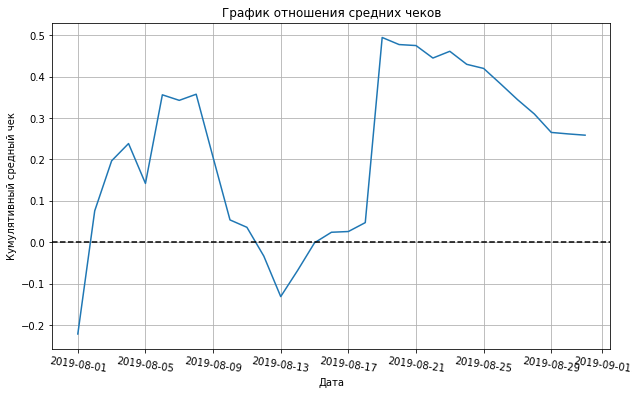

In [19]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = (
    cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 6))
plt.grid()
plt.xticks(rotation =-8)
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средный чек')
plt.title('График отношения средних чеков') 

# cтроим график отношения средних чеков
(
    plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b'] / 
                                                 merged_cumulative_revenue['orders_b']) / 
             (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a']) - 1)
)
plt.axhline(y=0, color='black', linestyle='--');

<div style="border:solid green 1px; padding: 10px">

В нескольких точках график различия между сегментами «скачет» и довольно сильно. Практически с самого начала теста группа В превосходит группу А по средним чекам, только в одном месте есть "провал" - в промежутке между 11 августа и 15 августа.
 
Скорее всего есть выбросы или большие заказы.

#### Построим график кумулятивной конверсии по дням и группам.


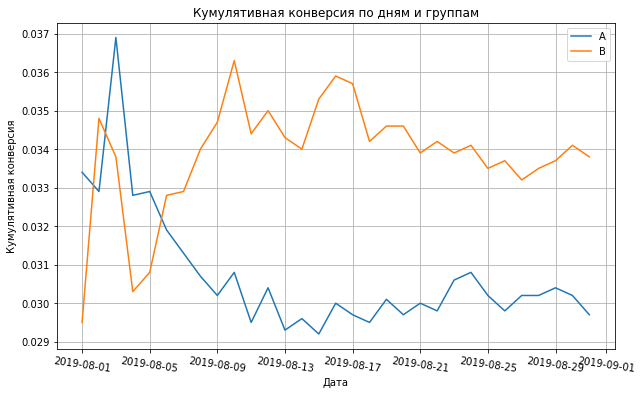

In [20]:
# считаем кумулятивную конверсию
cumulative_df['conversion'] = round(cumulative_df['orders']/cumulative_df['visitors'], 4)

# отделяем данные по группе A
cumulative_df_a = cumulative_df.query('group == "A"')

# отделяем данные по группе B
cumulative_df_b = cumulative_df.query('group == "B"')

# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 6))
plt.grid()
plt.xticks(rotation =-8)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('Кумулятивная конверсия по дням и группам') 

# строим графики
plt.plot(cumulative_df_a['date'], cumulative_df_a['conversion'], label='A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['conversion'], label='B')
plt.legend();

<div style="border:solid green 1px; padding: 10px">

График практически зеркален. Группы "скачат" и пересекаются в начале, но затем (с 6 августа) конверсия группы В рехко увеличилась и стабильно выше, а конверсия группы А уменьшилась и стабильно ниже.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

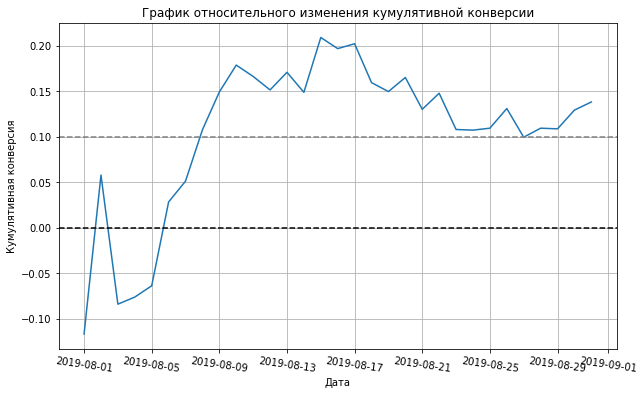

In [21]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = (
    cumulative_df_a[['date','conversion']].merge(cumulative_df_b[['date','conversion']],
                                                 left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 6))
plt.grid()
plt.xticks(rotation =-8)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('График относительного изменения кумулятивной конверсии') 

# строим график
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b'] / 
             merged_cumulative_conversions['conversion_a']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--');

<div style="border:solid green 1px; padding: 10px">
    
В начале теста значение по группе B то проигрывало группе A, то выигрывало (есть скачки в плюс на 2 августа, в минус на 3 августа и в сторону увеличения по 6 августа), затем вырвалось вперёд с 6 августа и далее только растет. На протяжении почти всего теста (начиная с 8 августа) конверсия группы B была выше группы А более чем на 10%.

В целом отношение конверсии ещё не установилось, и пока делать какие-либо выводы по тесту рано. Сначала проверим данные на аномалии, возможно, это изменит результаты. 

###  Анализ данных на аномалии и выбросы.

Аномалии и выбросы могут искажать результаты A/B-теста, их попадание в выборку способно внести погрешность.

Если аномально дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно. Такие заказы следует удалять из теста, что мы и сделаем как только выберем границу для определения аномалий.

Если делить упорядоченную выборку на 100 частей — получим перцентиль — значение, больше которого определённая доля элементов выборки. Так, 95й перцентиль - это значение больше которого будет 5% выборки, а 99й - это значение больше которого будет всего 1% выборки.

#### Точечный график количества заказов по пользователям и перцентили количества заказов.

Построим  точечный график количества заказов по пользователям и посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [22]:
# группируем заказы по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


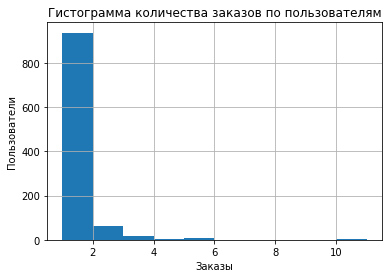

In [23]:
# построим гистограмму
plt.grid()
plt.xlabel('Заказы')
plt.ylabel('Пользователи')
plt.title('Гистограмма количества заказов по пользователям') 
plt.hist(orders_by_users['orders']);

<div style="border:solid green 1px; padding: 10px">

Большинство пользователей сделали 1 заказ, есть и такие, кто делал от 2х до 5ти заказов.

Есть пользователи, которые совершали 8, 9, 11 заказов. Значительно больше, чем обычный пользователь за неделю («обычный» пользователь совершает около двух заказов за короткий срок).

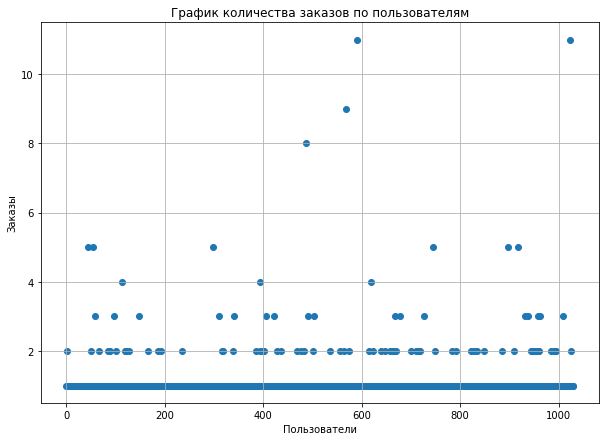

In [24]:
# построим точечный график
x_values = pd.Series(range(0,len(orders_by_users['orders'])))
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 7))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.title('График количества заказов по пользователям') 
plt.scatter(x_values, orders_by_users['orders']);

<div style="border:solid green 1px; padding: 10px">
Много пользователей в диапозоне от 1 до 5 заказов. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Определим сколько занимают наши заказы.

In [25]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

<div style="border:solid green 1px; padding: 10px">
    
Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали не более 4х раз.
Логично выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

####  Точечный график стоимостей заказов по пользователям и перцентили стоимости заказов.

Построим точечный график стоимостей заказов по пользователям и посчитаем 95-й и 99-й перцентили стоимости заказов на пользователя. Выберем границу для определения аномальных пользователей.

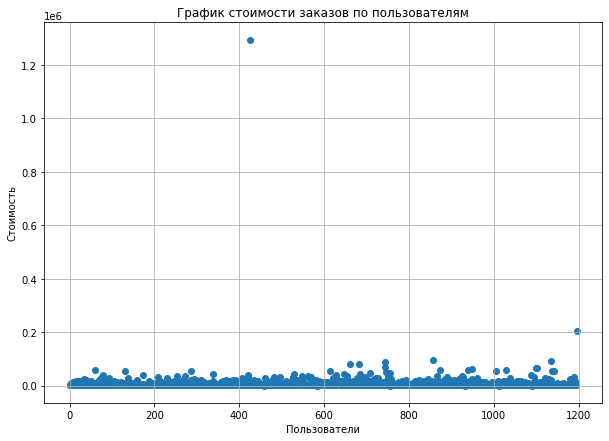

In [26]:
# построим точечный график
x_values = pd.Series(range(0,len(orders['revenue'])))
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 7))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.title('График стоимости заказов по пользователям') 
plt.scatter(x_values, orders['revenue']);

Есть пара дорогих заказов (202 740.00 и 1 294 500.00). По графику можно выбрать границу аномальных заказов на 100 000.00. Построим график без них: 

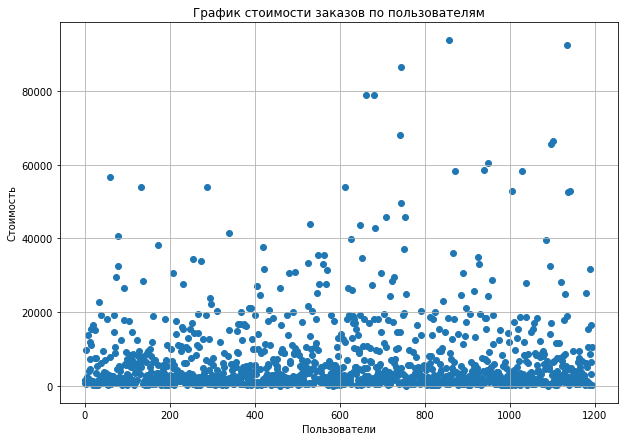

In [27]:
# построим точечный график, без 
x_values = pd.Series(range(0,len(orders.query('revenue < 100000')['revenue'])))
# добавляем нужные атрибуты в график
plt.figure(figsize=(10, 7))
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.title('График стоимости заказов по пользователям') 
plt.scatter(x_values, orders.query('revenue < 100000')['revenue']);

<div style="border:solid green 1px; padding: 10px">
График стал нагляднее, теперь можно предположить, что граница для аномалий находится где-то между 40 000.00 и 60 000.00. Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Определим сколько занимают наши заказы.

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<div style="border:solid green 1px; padding: 10px">
    
Не более 5% заказов дороже 28 000.00 и не более 1% дороже 58 233.20. Выберем сумму в 58 233.20 на одного пользователя за верхнюю границу стоимости заказов, и отсеим аномальных пользователей по ней.

### Статистическая значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным.

#### Cтатистическая значимость различий в среднем числе заказов

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:
* Нулевая гипотеза: различий в среднем количестве заказов между группами нет.
* Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

Установим уровень статистической значимости `alpha` на 5%.

In [29]:
#для пользователей, которые заказывали хотя бы 1 раз, соберем число совершённых заказов
orders_by_users_a = (
    orders.query('group == "A"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders.query('group == "B"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

In [30]:
#oбъявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов
sample_a = (pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum()
                                                   - len(orders_by_users_a['orders'])), name='orders')],axis=0)
          )
sample_b = (pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum()
                                                   - len(orders_by_users_b['orders'])), name='orders')],axis=0)
          )

In [31]:
#посчитаем статистическую значимость
print('p-value: ', "{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Oтносительный прирост среднего числа заказов: ', "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value:  0.017
Oтносительный прирост среднего числа заказов:  0.138


<div style="border:solid green 1px; padding: 10px">
    
p-value = 0.017, что меньше порога статистической значимости в 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
    
Oтносительный прирост заказов группы B к группе А равен 13,8%.

#### Cтатистическая значимость различий в среднем чеке

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:

* Нулевая гипотеза: различий в среднем чеке между группами нет;
* Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [32]:
#посчитаем статистическую значимость
print('p-value: ', 
    '{0:.3f}'.format(st.mannwhitneyu(orders.query('group == "A"')['revenue'],
                                        orders.query('group == "B"')['revenue'])[1])
)
print('Oтносительные различия в среднем чеке:',
    '{0:.3f}'.format(orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1)
)

p-value:  0.729
Oтносительные различия в среднем чеке: 0.259


<div style="border:solid green 1px; padding: 10px">
    
р-value = 0.729, что значительно больше порога статистической значимости в 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. 

Средний чек группы B значительно выше (почти на 26%) среднего чека группы A, что указывает на возможное наличие выбросов и аномалий в данных.

###  Статистическая значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по очищенным данным.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке по очищенным данным. Для этого нужно сделать "срезы пользователей", у которых количество заказов больше двух и стоимость превышает 50 000.00. Таких пользователей будем считать аномальными и вынесем в отдельный список.

In [33]:
#ограничиваем по количеству заказов
percentile_95 = np.percentile(orders_by_users['orders'], [95])[0]
many_orders = pd.concat([orders_by_users_a.query('orders > @percentile_95')['visitor_id'],
        orders_by_users_b.query('orders > 2')['visitor_id']], axis=0)

#ограничиваем по стоимости заказов
percentile_99 = np.percentile(orders['revenue'], [99])[0]
expsv_orders = orders.query('revenue > @percentile_99')['visitor_id']

#собираем все id пользователей в список
user_ids = (pd.concat([many_orders, expsv_orders], axis=0).drop_duplicates().sort_values())

#узнаем сколько пользователей с аномальными данными в списке
user_ids.shape[0]

31

#### Cтатистическая значимость различий в среднем числе заказов

In [34]:
# подготовка данных
#группа А
sample_a_clean = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(user_ids))]
                            ['orders'], pd.Series(0, index=np.arange(
                                visitors.query('group == "A"')['visitors'].sum() - len(orders_by_users_a['orders'])),
                                                  name='orders')], axis=0)
#группа B
sample_b_clean = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(user_ids))]
                            ['orders'], pd.Series(0, index=np.arange(
                                visitors.query('group == "A"')['visitors'].sum() - len(orders_by_users_b['orders'])),
                                                  name='orders')], axis=0)


In [35]:
#посчитаем статистическую значимость
print('p-value: ', "{0:.5f}".format(st.mannwhitneyu(sample_a_clean, sample_b_clean)[1]))
print('Oтносительный прирост среднего числа заказов: ',
      "{0:.3f}".format(sample_b_clean.mean() / sample_a_clean.mean() - 1))

p-value:  0.00633
Oтносительный прирост среднего числа заказов:  0.186


<div style="border:solid green 1px; padding: 10px">
    
p-value еще снизился (по сравнению с неочищенными от аномалий данными примерно на 0.011), а относительный прирост заказов группы B к группе А увеличился, по сравнению с "сырыми" данными на 4.8%. Т.е. нулевую гипотезу по прежнему отвергаем.

#### Cтатистическая значимость различий в среднем чеке между группами

In [36]:
# посчитаем статистическую значимость
print('p-value: ', 
    '{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                           np.logical_not(orders['visitor_id'].isin(user_ids)))]
                                     ['revenue'], orders[np.logical_and(orders['group'] == 'B',
                                                np.logical_not(orders['visitor_id'].isin(user_ids)))]['revenue'])[1]))

print('Oтносительные различия в среднем чеке:',
    "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(user_ids)))]
                     ['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
                                                                np.logical_not(orders['visitor_id'].isin(user_ids)))]
                     ['revenue'].mean() - 1)) 

p-value:  0.798
Oтносительные различия в среднем чеке: -0.020


<div style="border:solid green 1px; padding: 10px">
    
р-value стал больше относительно "сырых" данных на 0,069, а вот средний чек группы B относительно среднего чека группы A снизился и теперь на 2% меньше среднего чека группы А. Но нулевую гипотезу по прежнему не отвергаем.

###  Решение по результатам теста.

<div style="border:solid green 2px; padding: 20px">

Выводы по А/В-тесту:

* есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
* нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Надо отметить, что после фильтрации различие в чеках снизилось с 26% до 1.9%;
* график различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть тенденция к дальнейшему увеличению;
* график различия среднего чека по группам сильно колеблется на всем протяжении, но в целом говорит о том, что результаты группы B лучше группы А более чем на 25%.

Исходя из обнаруженных фактов, тест можно остановить и признать его успешным, потому что при имеющихся данных группа B стабиьно лучше группы A.